# - 의류 분류를 위한 기본 classification

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## 1. Keras에 있는 fashion mnist 데이터 가져다 train_image와 test_image로 저장하고, 두가지 라벨 저장
#### * 외부망 연결 필요! 

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               ## train_label과 test_label은 숫자로 되어있기 때문에 각 번호에 맞는 class 이름 array에 저장

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(test_labels)

10000

## 2. 하나의 image를 plt로 표현 28x28 픽셀에 255까지의 모양 표현

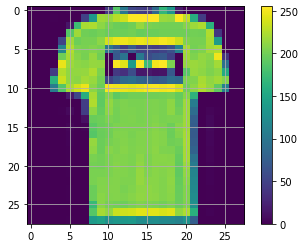

In [7]:
plt.figure()                        ## 생성
plt.imshow(train_images[1])         ## train_image 중 1번에 있는 그림 표시
plt.colorbar()                      
plt.grid(True)
plt.show()

## 3. 딥러닝 입력 데이터 정규화 - Nomalization (255까지 나타난 숫자를 0~1의 범위로 변경)
#### - 학습을 빨리하고 local optimum에 빠지는 가능성 줄임

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

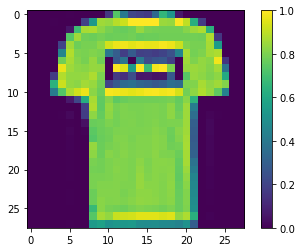

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

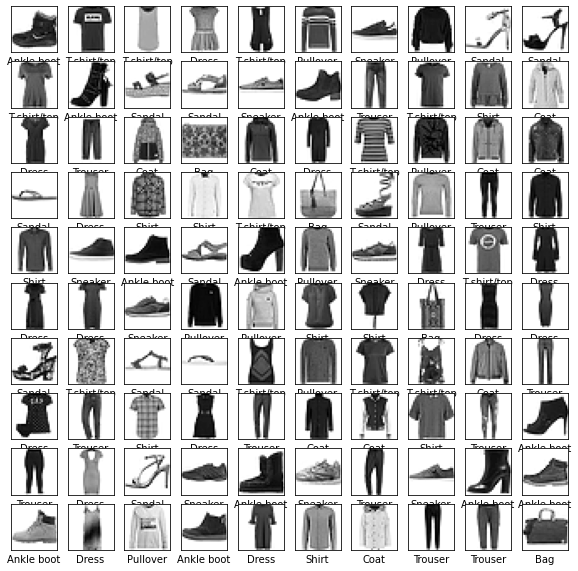

In [10]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4. 모델 빌드 (input shape을 초기에 설정해줌)

In [20]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10))

In [21]:
len(model.weights)

4

In [11]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),          ## 28x28 array를 784x1로 변경
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)                              ## 10개의 class 이기 때문에 10개의 최종 output
])

## 5. 모델 compile ()
#### - loss function: 모델이 얼마나 정확한지 오차를 measure하는 함수
#### - optimizer: 오차를 줄이기 위해 모델을 어떻게 update할지 정하는 역할
#### - metrics: 정확도를 체크하는 방법

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 6. 모델 Train

In [27]:
model.fit(train_images, train_labels, epochs=5, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1553 - accuracy: 0.9417
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1514 - accuracy: 0.9427
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1480 - accuracy: 0.9444
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1454 - accuracy: 0.9451
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1388 - accuracy: 0.9480


## 7. Evaluate accuracy

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8868


In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

In [30]:
predictions[0]

array([5.5775656e-14, 1.3428413e-16, 4.2568596e-12, 8.2823523e-17,
       1.0458094e-17, 2.0846757e-04, 6.3706375e-12, 5.1220896e-04,
       4.8655669e-16, 9.9927932e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

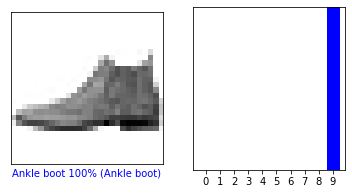

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

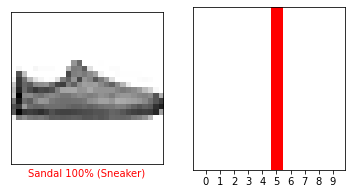

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

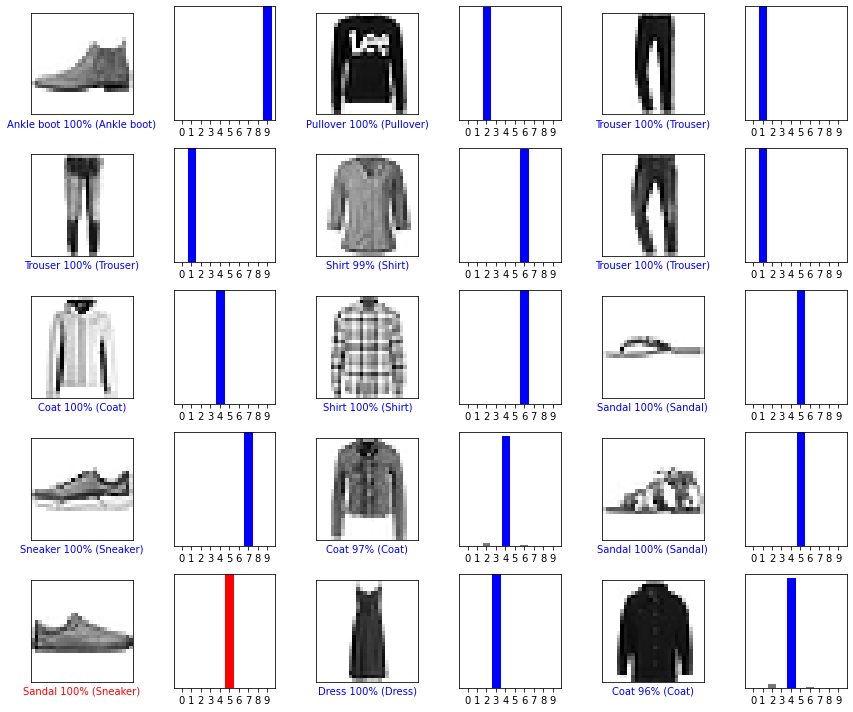

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()